# Machine Learning Classification Model

In [ ]:
???

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/INTC_subset_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000,-1.231284,DOWN
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900,-0.283661,DOWN
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200,-1.696929,DOWN
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100,0.067833,UP
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500,0.556489,UP
...,...,...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900,-0.041824,DOWN
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300,-1.918162,DOWN
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200,-3.393559,DOWN


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [2]:
target = df.change_tomorrow_direction
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [3]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

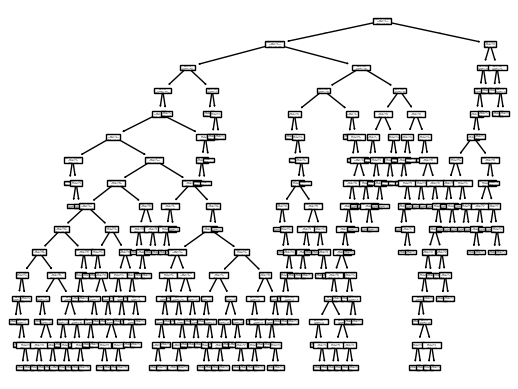

In [4]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [5]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,60.240002,60.970001,60.220001,60.840000,18056000
2020-01-03,59.810001,60.700001,59.810001,60.099998,15293900
2020-01-06,59.590000,60.200001,59.330002,59.930000,17755200
2020-01-07,59.779999,59.799999,58.889999,58.930000,21876100
2020-01-08,58.889999,59.320000,58.520000,58.970001,23133500
...,...,...,...,...,...
2024-09-26,24.280001,24.420000,23.250000,23.920000,95416900
2024-09-27,24.160000,24.660000,23.700001,23.910000,85883300
2024-09-30,23.740000,23.950001,23.090000,23.459999,66308200


In [6]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['DOWN', 'DOWN', 'DOWN', ..., 'DOWN', 'DOWN', 'DOWN'], dtype=object)

In [7]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2020-01-02,DOWN,DOWN
2020-01-03,DOWN,DOWN
2020-01-06,DOWN,DOWN
2020-01-07,UP,UP
2020-01-08,UP,UP
...,...,...
2024-09-26,DOWN,DOWN
2024-09-27,DOWN,DOWN
2024-09-30,DOWN,DOWN


### Evaluate the model: compare predictions with the reality

In [8]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [9]:
comp.sum()

917

In [10]:
len(comp)

1196

In [11]:
comp.sum()/len(comp)

0.7667224080267558

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [12]:
import pickle

In [13]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)